## Lab 5A

*Lab 5 consists of two exercises. This is the first of two exercises, which will cover regressions and time series data.*

In this exercise, you will conduct a simple linear regression analysis on home data value data and plot a regression line on three metropolitan areas in the United States. 

### Dataset 

This exercise will use the CSV file ```Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv```. This dataset comes from [Zillow research data](https://www.zillow.com/research/data/) and contains the Zillow Home Value Index (ZHVI), which is "A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type". 

### Tasks

1. Read in the ```Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv``` CSV file as a ```DataFrame```. 
2. Note that the data is in the wide form. You should transform it to the long form using ```melt()```. Only include the data for the metropolitan areas of San Antonio, TX, New York City, NY, and a third area of your choice. Make sure that your third area has data. 
3. Conduct a simple linear regression where the independent variable is the year and the dependent variable is the average home value index for that year for each metroplitan area using ```linregress()```. 
4. Using the results of your linear regression analysis, compute the predicted home values for the year 2030.
5. Create a ```regplot()``` for each of the metroplitan areas. The regplot should extend the line to the year 2030. You can select any approach to creating these multiple plots (e.g., subplots, facet grids, etc.)
6. Answer the questions below. 

In [3]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

class MetropolitanArea:
    def __init__(self, region_name):
        self.region_name = region_name
        self.df = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv')
        self.df = self.df.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], 
                               var_name='Date', value_name='ZHVI')
        self.df = self.df[self.df['RegionName'] == self.region_name]
        self.df['Date'] = self.df['Date'].str.extract(r'(\d{4})').astype(int)
        self.slope, self.intercept, self.r_value, self.p_value, self.std_err = linregress(self.df['Date'], self.df['ZHVI'])
    
    def predict_home_value(self, year):
        return self.slope * year + self.intercept

    def plot_data(self, ax):
        sns.regplot(x='Date', y='ZHVI', data=self.df, ax=ax, label='data')
        x_values = np.arange(1996, 2031)
        y_values = self.predict_home_value(x_values)
        ax.plot(x_values, y_values, color='red', label='regression line')
        r_squared = round(self.r_value ** 2, 2)
        line_formula = f'y = {round(self.slope, 2)}x + {round(self.intercept, 2)}'
        ax.text(0.20, 0.15, f'R-squared = {r_squared}\n{line_formula}', transform=ax.transAxes, va='top')
        ax.set_title(self.region_name)
        ax.set_xlabel('Year')
        ax.set_ylabel('ZHVI')
        ax.set_xlim(1996, 2030)
        ax.set_ylim(0, 1000000)
        ax.legend()

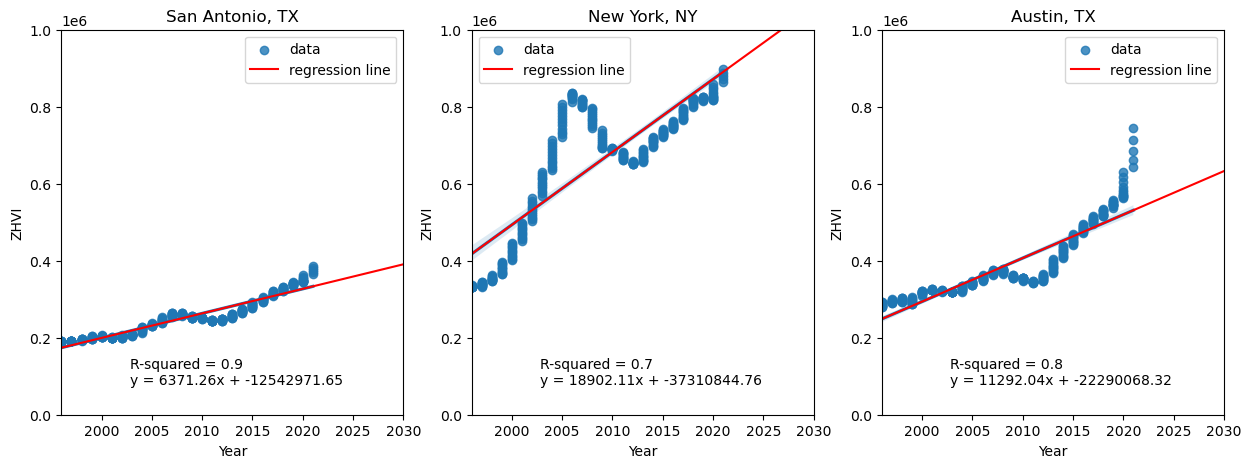

In [4]:
# Your visualization code goes here
# Create the metropolitan areas
sa = MetropolitanArea('San Antonio, TX')
nyc = MetropolitanArea('New York, NY')
third_area = MetropolitanArea('Austin, TX')

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the data for each metropolitan area
sa.plot_data(ax=axes[0])
nyc.plot_data(ax=axes[1])
third_area.plot_data(ax=axes[2])

plt.show()

### Questions

Answer the following questions:

1. Based on your linear regression analysis, what are the predicted home values in 2030 in each of your metropolitan areas? 

2. How are the predicted home values for 2030 in line with what current real estate trends show with respect to those metroplitan areas? 

3. Looking at your regplot, are there are spikes or dips in home values in past? If so, what are some possible reasons for them in those regions? If there were no major spikes and dips, what are some possible reasons for a steady change in home values for those metropolitan regions? Find some sources to support those explanations.


### Answers


#### 1.

In [10]:
from tabulate import tabulate
import locale

predictions = {
    sa.region_name:sa.predict_home_value(2030),
    nyc.region_name:nyc.predict_home_value(2030),
    third_area.region_name:third_area.predict_home_value(2030)
    }

# Set the locale to US dollars
locale.setlocale(locale.LC_ALL, 'en_US')


# Convert predictions to a list of lists
table = []
for region, value in predictions.items():
    formatted_value = locale.currency(value, grouping=True)
    table.append([region, formatted_value])

# Print the table
print(tabulate(table, headers=["Region", "Predicted Home Value"]))

Region           Predicted Home Value
---------------  ----------------------
San Antonio, TX  $390,688.57
New York, NY     $1,060,445.89
Austin, TX       $632,777.29


#### 2. 

San Antonio, TX: According to a report by the San Antonio Board of Realtors (SABOR), the San Antonio housing market has been experiencing strong growth, with home sales increasing and inventory levels dropping. The report notes that low interest rates and an influx of out-of-state buyers are contributing to the demand for housing in the area. **However, rising construction costs and a shortage of available land are expected to slow the pace of new home construction.** Source: San Antonio Board of Realtors Market Report Q3 2021

New York, NY: The New York City real estate market has been impacted by the COVID-19 pandemic, with many residents leaving the city for more suburban or rural areas. According to a report by Douglas Elliman Real Estate, the number of Manhattan home sales in the third quarter of 2021 was up 60% compared to the same period in 2020, but still down 29% compared to 2019. **However, the report notes that the luxury real estate market is rebounding, with sales of properties priced over $10 million up 36% year over year.** Source: Douglas Elliman Real Estate Q3 2021 Manhattan Sales Report

Austin, TX: Austin has been one of the fastest-growing cities in the United States in recent years, and the housing market has been keeping pace with that growth. **According to a report by the Austin Board of Realtors, home sales in the Austin area increased by 14.7% in September 2021 compared to the same month in 2020. However, the report notes that the median price of a single-family home in the area has increased by 29.2% year over year, indicating that demand for housing is outpacing supply.** Source: Austin Board of Realtors Central Texas Housing Market Report September 2021

#### 3.
The U.S. housing market experienced a significant downturn between 2010 and 2012, following the 2008 financial crisis. Here are some sources that provide information about what happened during that time period:

According to a report by the U.S. Department of the Treasury, the housing market crash was triggered by a combination of factors, including subprime lending, declining home prices, and an oversupply of homes. As more and more borrowers defaulted on their mortgages, foreclosures increased and home prices continued to decline, causing a ripple effect throughout the entire housing market. Source: U.S. Department of the Treasury, "The State of the Housing Market"

A report by the Urban Institute provides some statistics on the state of the housing market during this time period. According to the report, home prices fell by 33% between their peak in 2006 and their trough in 2012, and foreclosure rates increased from 1.2% in 2006 to 2.2% in 2010. The report notes that the housing market has since recovered, but that the recovery has been uneven, with some areas experiencing more growth than others. Source: Urban Institute, "Housing Finance at a Glance: A Monthly Chartbook"

A report by the National Association of Realtors (NAR) provides some insight into the impact of the housing market crash on home sales. According to the report, existing home sales fell by 4.7% between 2010 and 2011, and then increased by 9.2% between 2011 and 2012. The report notes that while the housing market crash had a significant impact on the overall economy, the recovery of the housing market played a key role in the broader economic recovery. Source: National Association of Realtors, "The Impact of the Housing Crisis on the Economy"

These sources provide some insight into what happened to the housing market between 2010 and 2012, but it's worth noting that the housing market is complex and affected by a wide range of factors.